## 5. Machine Learning Library 🤖
Very briefly, Machine Learning algorithm can be divided into two main categories; the classical one (such as linear regression, SVM, etc) and deep learning (involves neural network)
We will be looking at each library (or maybe some of it) during a later stage of our tutorial.


### 5.1 Scikit-Learn

Scikit-learn is a library in Python that provides many unsupervised and supervised learning algorithms. It’s built upon some of the technology you might already be familiar with, like NumPy, pandas, and Matplotlib!

- There is a vast collection of ML algorithms that are all included (It’s like a repo, but a repo of ML algorithm)
- An amazing way to get a handle of what different types of models do, as well as giving some intuition about some algorithm perform

##### 5.1.1 Example

For our first ML example that we will be doing, we are going to look at PENGUIN 🐧. We will have a dataset called 'penguins.csv' which contains data of 344 cute penguins. In this dataset, there are 3 different species of penguins coming from 3 islands in the Palmer Archipelago. These three classes are Adelie, Chinstrap, and Gentoo. Also, these datasets contain culmen dimensions for each species. This dataset is created by Dr.Kristen Gorman and the Palmer Station, Antarctica LTER.

If you want to have a deeper look at this dataset, search 'Palmer Penguin dataset' in your favourite search engine.

The aim of our model is to be able to predict which species the penguin are (either Adelie, Chinstrap, and Gentoo) given some information (or formally called feature in the ML world)

<b>Import Relevant Libraries</b>

So, let's get started. As always, the first step is always to import the relevant library first

In [38]:
import pandas as pd                     
import math
from sklearn import svm             # Fetch a module called svm from sklearn library
from sklearn.metrics import accuracy_score, confusion_matrix         # Fetch a module called metrics from sklearn library

<b>Make a simple sklearn classifier</b>

First, read the data in using pandas.read_csv(). Note that the final column contains the class_type field that we are interested in.

In [39]:
data = pd.read_csv("penguins.csv")               # Change the location of the file if it is not in the current directory
data.head(6)                                # Take a look at the top 6 rows in the class

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


<b>Data Preprocessing</b>

For this step, we transform our data to a 'higher-quality' format. This comes from the idea that for a model to be accurate and precise in predictions is that the algorithm should be able to easily interpret the data's features. 

Some main step involved in this process is:
- Data Cleaning
- Data Transformation
- Data Reduction (Dimensionality Reduction)

We will look further into these steps during future lecture. If you want to look further, [this is a wonderful resource](https://developer.ibm.com/articles/data-preprocessing-in-detail/) is a which describes data preprocessing in a concise way.

For now, we will just simply delete features that are non-numerical, which are 'island' and 'sex'. If you're wondering why can't we just change those features into numerical feature by classifying each entry in the feature by some value, we definitely can. But the content creator is just too lazy for this. Try it for yourself and see whether including 'island' and 'sex' feature does improve the model.

In [40]:
data_updated = data.drop(columns=['island', 'sex'])         # Drop 'island' and 'sex' features
data_updated.head()

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,Adelie,39.1,18.7,181.0,3750.0
1,Adelie,39.5,17.4,186.0,3800.0
2,Adelie,40.3,18.0,195.0,3250.0
3,Adelie,NaN,NaN,NaN,NaN
4,Adelie,36.7,19.3,193.0,3450.0


Now, all of our data is in the numerical format right? NO!!! If you look closely. There's a NaN value in our dataset. A simple workaround for this is just delete those entry which has NaN value. This is another aspect that you can try play to improve your model. Try changing the NaN value to the mean of each column, or maybe the mode of each column.

In [41]:
data_updated = data_updated.dropna()
display(data_updated)

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,Adelie,39.1,18.7,181.0,3750.0
1,Adelie,39.5,17.4,186.0,3800.0
2,Adelie,40.3,18.0,195.0,3250.0
4,Adelie,36.7,19.3,193.0,3450.0
5,Adelie,39.3,20.6,190.0,3650.0
...,...,...,...,...,...
338,Gentoo,47.2,13.7,214.0,4925.0
340,Gentoo,46.8,14.3,215.0,4850.0
341,Gentoo,50.4,15.7,222.0,5750.0
342,Gentoo,45.2,14.8,212.0,5200.0


Now, it's time to split our dataset into two categories, which are training set and testing set.

First, let's assign all our features into a variable called all_X, while all our labels into a variable called all_y

In [42]:
data_updated.shape

(342, 5)

In [43]:
all_X = data_updated.iloc[:, 1:]
all_y = data_updated.iloc[:, 0]

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(all_X, all_y)

In [45]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(256, 4) (86, 4) (256,) (86,)


<b>Train and Evaluate the model</b>

We just call the function `.fit()` to start the training of the model

It's easy to swap in a different model of your choice.

In [46]:
clf = svm.SVC()
clf.fit(X_train, y_train)  

SVC()

<b>Evaluate the model</b>

To make a prediction, just call the fucntion `.predict()`
Usually, we will use the unseen dataset (x_test) for our model to predict. This is because our main goal is we want to build a model that will be able to generalize well, meaning it can still perform well despite looking at dataset that it has never seen before 

In [47]:
predicted = clf.predict(X_test)


We will use `.accuracy_score()` function to find the accuracy of our predicted dataset
On top of that, `confusion_matrix()` will print a confusion matrix

Click [here](https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62) for further explanation on confusion matrix

In [48]:
scikit_accuracy = accuracy_score(predicted, y_test)
print("Accuracy (using SVM): ", scikit_accuracy)
print(confusion_matrix(predicted, y_test))

Accuracy (using SVM):  0.7325581395348837
[[35 18  1]
 [ 0  0  0]
 [ 3  1 28]]


#### 5.1.2 Further Resources

- [Scikit-Learn Tutorials](https://scikit-learn.org/stable/tutorial/index.html)
- [Kaggle - Scikit-learn From Start to Finish](https://www.kaggle.com/code/jeffd23/scikit-learn-ml-from-start-to-finish)
- [Cheat Sheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Scikit_Learn_Cheat_Sheet_Python.pdf)
- [Documentation](https://scikit-learn.org/stable/modules/classes.html)

### 5.2 TensorFlow

TensorFlow is a library that makes machine learning and particularly developing neural networks faster and easier. It is mainly used for developing deep learning model. It makes building models easier, faster and more reproducible

#### 5.2.1 Example

For this example, we will build a simple neural network to solve the same problem, which is to predict the species of a penguin given some features.

*Note that the exact same dataset (which has been preprocessed at earlier stage) will be used for the training of neural network

<b>Import relevant libraries</b>

As always, lets import the relevant module

In [49]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

<b>Data Preprocessing</b>
 
In the Data Preprocessing step, there are a few things that we need to do:

1. <b>Convert our dataset (which are in Pandas Series and DataFrame) into Numpy Array</b>
- The reason for doing this is Tensorflow prefer to process its input in Numpy-array datatype, or even better in TensorFlow tensor datatype

2. <b>Transform our label (which is currently in String type) into one-hot embedding </b>
- This is attributed to the format of output of our neural network (which is it contains an array of 3 element)

3. <b>Standardize our features</b>
- This is primarily because of what happens inside of the NN (vanishing gradient problem can easily occured when the range of the features are very large)

Now, our dataset is still on Pandas Series and DataFrame type. We need to change it to Numpy array as Tensorflow (or rather, the function that we will call later) prefer to process its input in Numpy-array, or even better in TensorFlow tensor

In [50]:
from tensorflow.keras.utils import to_categorical                       # to_categorical allows us to converts a class vector (integers) to binary class matrix.

y_train = y_train.replace({'Adelie':0,'Chinstrap':1, 'Gentoo':2})       # Change the string in y_train into an integer
y_test = y_test.replace({'Adelie':0,'Chinstrap':1, 'Gentoo':2})         # Change the string in y_test into an integer

y_train = to_categorical(y_train)       # One-hot embedding
y_test = to_categorical(y_test)         

In [51]:
X_train = X_train.values            # Change X_train to numpy array
X_test = X_test.values              # Change X_test from DataFrame to numpy array

In [52]:
X_train

array([[  41.1,   18.6,  189. , 3325. ],
       [  49.5,   19. ,  200. , 3800. ],
       [  48.5,   17.5,  191. , 3400. ],
       ...,
       [  36.5,   18. ,  182. , 3150. ],
       [  47.4,   14.6,  212. , 4725. ],
       [  45.8,   14.2,  219. , 4700. ]])

To standardize our feature, the easy way is just to use the function provided by scikit-learn.

What standardize does is that it subract our value by its mean and scale it to unit variance

    z = (x - u) / s



In [53]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [66]:
X_test[:5]

array([[ 0.34978806, -0.11952499, -0.32646143, -0.86178483],
       [ 1.2491795 , -1.55754071,  1.19114305,  1.88894803],
       [-1.16195499,  1.10545136, -1.36119175, -1.11185146],
       [-0.16688362,  0.67937263, -0.39544345,  0.07596501],
       [ 0.5985559 , -1.55754071,  0.98419698,  0.82616488]])

Now, we can see that our input feature has been standardized. The value of each element is not wildly different as it is before the standardization operation is executed

<b>Build and Compile Model</b>

First, read the data in using pandas.read_csv(). Note that the final column contains the class_type field that we are interested in.

In [55]:
model = Sequential()
model.add(Dense(units=32, activation='relu', input_dim=len(X_train[0])))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=3, activation='sigmoid'))

model.summary()             # Print the summary of our model

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 32)                160       
                                                                 
 dense_6 (Dense)             (None, 128)               4224      
                                                                 
 dense_7 (Dense)             (None, 128)               16512     
                                                                 
 dense_8 (Dense)             (None, 64)                8256      
                                                                 
 dense_9 (Dense)             (None, 3)                 195       
                                                                 
Total params: 29,347
Trainable params: 29,347
Non-trainable params: 0
_________________________________________________________________


`.compile()` function used below is to compile our model. When we compile our model, what we're basically doing is telling TensorFlow how we want our model to be trained

In [56]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

<b>Fit, Predict and Evaluate</b>

Before we start training our neural network, there is one problem with our dataset, which is our label is in string format (meaning it is in words). And generally, neural network can't accept string format, hence we need to encode the value into a numerical format.

Now, we're ready to start our training by calling `.fit()` function

In [57]:
history = model.fit(X_train, y_train, epochs=200, batch_size=64)

Epoch 1/200
4/4 [==============================] - 0s 11ms/step - loss: 1.1043 - accuracy: 0.1992
Epoch 2/200
4/4 [==============================] - 0s 10ms/step - loss: 1.1027 - accuracy: 0.2031
Epoch 3/200
4/4 [==============================] - 0s 9ms/step - loss: 1.1012 - accuracy: 0.2109
Epoch 4/200
4/4 [==============================] - 0s 9ms/step - loss: 1.0996 - accuracy: 0.2266
Epoch 5/200
4/4 [==============================] - 0s 9ms/step - loss: 1.0981 - accuracy: 0.2305
Epoch 6/200
4/4 [==============================] - 0s 9ms/step - loss: 1.0966 - accuracy: 0.2656
Epoch 7/200
4/4 [==============================] - 0s 9ms/step - loss: 1.0951 - accuracy: 0.2773
Epoch 8/200
4/4 [==============================] - 0s 9ms/step - loss: 1.0936 - accuracy: 0.2930
Epoch 9/200
4/4 [==============================] - 0s 9ms/step - loss: 1.0921 - accuracy: 0.3047
Epoch 10/200
4/4 [==============================] - 0s 11ms/step - loss: 1.0906 - accuracy: 0.3242
Epoch 11/200
4/4 [========

Once we have trained it, we can see how our model perform on each of the training epoch

In [58]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


dict_keys(['loss', 'accuracy'])


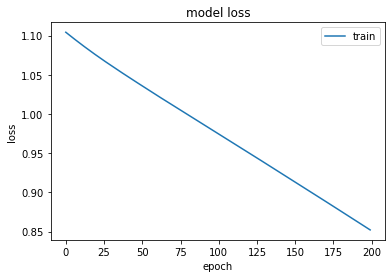

In [59]:
import matplotlib.pyplot as plt

print(history.history.keys())

# Summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

From the figure above, it looks like our model is performing better and better as the number of training (epoch) increases, which is a good sign!

<b>Evaluate our model</b>

And finally, once we have a model that seems to train quite well, we can proceed to the evaluation stage. In this stage, we are going to ask the model to predict on the dataset of penguin we have never seen before (which is X_test). To do this, in TensorFlow, we can just call `.predict()` and TensorFlow itself will do the heavy lifting of predicting the dataset that we pass 

In [60]:
y_output = model.predict(X_test)            # Predict X_test by 
print(y_output[:10])                        # Print the top 10 rows of the produced output

[[0.5345113  0.47786322 0.49171287]
 [0.50538385 0.47197738 0.5489449 ]
 [0.7116676  0.4192878  0.4321921 ]
 [0.57126695 0.4553468  0.4913654 ]
 [0.51118517 0.4676627  0.5489432 ]
 [0.5726141  0.45565468 0.4870718 ]
 [0.53534174 0.49313956 0.47672448]
 [0.52639073 0.46731538 0.5472154 ]
 [0.64711875 0.42866808 0.45303357]
 [0.65696526 0.43830952 0.45201814]]


Let's take a moment and understand what does the produced output indicates.

Remember that each row corresponds to a sample (Row 0 = Sample 0, Row 1 = Sample 1, ...). And from the output above, each row has an array with three elements. Each element actually represents the probability of how certain our neural network is with the corresponding label.

Let's take a look at the array below
        
        [0.65591866 0.4409073  0.44767407]

This array means that the probability of our NN to predict the sample to be 0 (Adelie) is ~0.655, and then to predict 1 (Chinstrap) is ~0.441, and to predict 2 (Gentoo) is ~0.448.
From this, the logical thing to do is to take the label with the highest probability score to be labelled as predicted output. 

And now, our predicted output for this sample is Chinstrap

In [61]:
import numpy as np

y_predicted = np.argmax(y_output, axis=1)       # For each row, take the index of the element with the highest probability
print(y_predicted)

[0 2 0 0 2 0 0 2 0 0 0 0 2 0 0 0 2 2 2 0 0 0 0 0 2 0 0 0 2 2 0 2 0 0 0 0 0
 0 0 2 0 0 0 2 2 2 2 0 0 2 2 0 0 0 2 2 0 2 0 0 2 0 2 2 0 0 0 2 0 0 0 2 0 2
 0 0 0 2 0 0 0 0 0 0 0 0]


In [62]:
# We also need to convert our y_test so that it produces an array in which each element represents the index of the correct label
y_expected = np.argmax(y_test, axis=1)
print(y_expected)

[1 2 0 0 2 0 1 2 0 0 0 0 2 0 1 0 2 2 2 0 1 0 0 0 2 1 1 0 2 2 0 2 0 1 0 1 1
 0 1 2 0 0 0 2 2 2 2 1 1 2 2 0 0 0 2 2 0 2 1 1 2 0 2 2 0 0 0 2 1 1 0 2 0 2
 0 0 0 2 1 2 0 1 1 0 0 0]


The code below is just to improve readability. What it does is basically convert all the embedding into the real label (which is the name of the species of penguin)

In [63]:
def convert_to_label(array):
    result = []
    for y in array:
        if y == 0:
            y = 'Adelie'
        elif y == 1:
            y = 'Chinstrap'
        elif y == 2:
            y = 'Gentoo'
        result.append(y)
    
    return result

y_predicted_label = convert_to_label(y_predicted)
y_expected_label = convert_to_label(y_expected)

In [64]:
print(y_predicted_label)

['Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Adelie', 'Gentoo', 'Gentoo', 'Gentoo', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Adelie', 'Gentoo', 'Gentoo', 'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Adelie', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Adelie', 'Adelie', 'Gentoo', 'Gentoo', 'Adelie', 'Adelie', 'Adelie', 'Gentoo', 'Gentoo', 'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Gentoo', 'Gentoo', 'Adelie', 'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie']


And lastly let's seee how our Neural Network model performs by calculating the accuracy_score

In [65]:
tf_accuracy = accuracy_score(y_predicted_label, y_expected_label)

print("Accuracy (using Neural Network): ", tf_accuracy)

Accuracy (using Neural Network):  0.7674418604651163


#### 5.2.2 Further Resources

- [TensorFlow Quickstart](https://www.tensorflow.org/tutorials/quickstart/beginner)
- [TensorFlow Tutorial](https://machinelearningmastery.com/tensorflow-tutorial-deep-learning-with-tf-keras/)
- [Cheat Sheet](https://github.com/kailashahirwar/cheatsheets-ai/blob/master/PDFs/Tensorflow.pdf)
- [Cheat Sheet](https://www.kaggle.com/getting-started/134439)
- [Documentation](https://www.tensorflow.org/api_docs/python/tf)

### 5.3 PyTorch

- PyTorch is an optimized Deep Learning tensor library based on Python and Torch and is mainly used for applications using GPUs and CPUs. PyTorch is favored over other Deep Learning frameworks like TensorFlow and Keras since it uses dynamic computation graphs and is completely Pythonic. - Simplilearn

- PyTorch is a machine learning framework based on the Torch library, used for applications such as computer vision and natural language processing, originally developed by Meta AI and now part of the Linux Foundation umbrella. - Wikipedia

- An open source machine learning framework that accelerates the path from research prototyping to production deployment. - PyTorch website

#### 5.3.1 Further Resources

- [PyTorch Quickstart](https://pytorch.org/tutorials/beginner/basics/quickstart_tutorial.html)
- [Implement NN for Penguin Classification with PyTorch](https://github.com/rianrajagede/penguin-python/blob/master/Pytorch/penguin_pytorch.py)
- [PyTorch vs TensorFlow](https://towardsdatascience.com/pytorch-vs-tensorflow-spotting-the-difference-25c75777377b)
- [Cheat Sheet](https://www.stefanseegerer.de/media/pytorch-cheatsheet-EN.pdf)
- [Documentation](https://pytorch.org/docs/stable/index.html)